Saving Wifi_Networks.csv to Wifi_Networks (1).csv
Total Networks: 992

Manufacturer Breakdown:
Cisco                   135
RuckusWi                122
Ubiquiti                 33
Netgear                  24
Arcadyan                 18
eero                     15
MS-NLB-PhysServer-24     15
Technico                 14
CradlePo                 14
ARRISGro                 14
WistronN                 11
Tp-LinkT                 10
OpenMesh                 10
ASUSTekC                 10
IgniteNe                  9
AskeyCom                  8
TP-Link                   7
Routerbo                  6
CiscoMer                  6
EnGenius                  5
Sagemcom                  4
CambiumN                  4
ArubaaHe                  4
Xirrus                    4
BelkinIn                  4
HonHaiPr                  3
GemtekTe                  3
Motorola                  2
Fortinet                  2
D-LinkIn                  2
Shenzhen                  2
KBCNetwo                  2
NokiaSol 

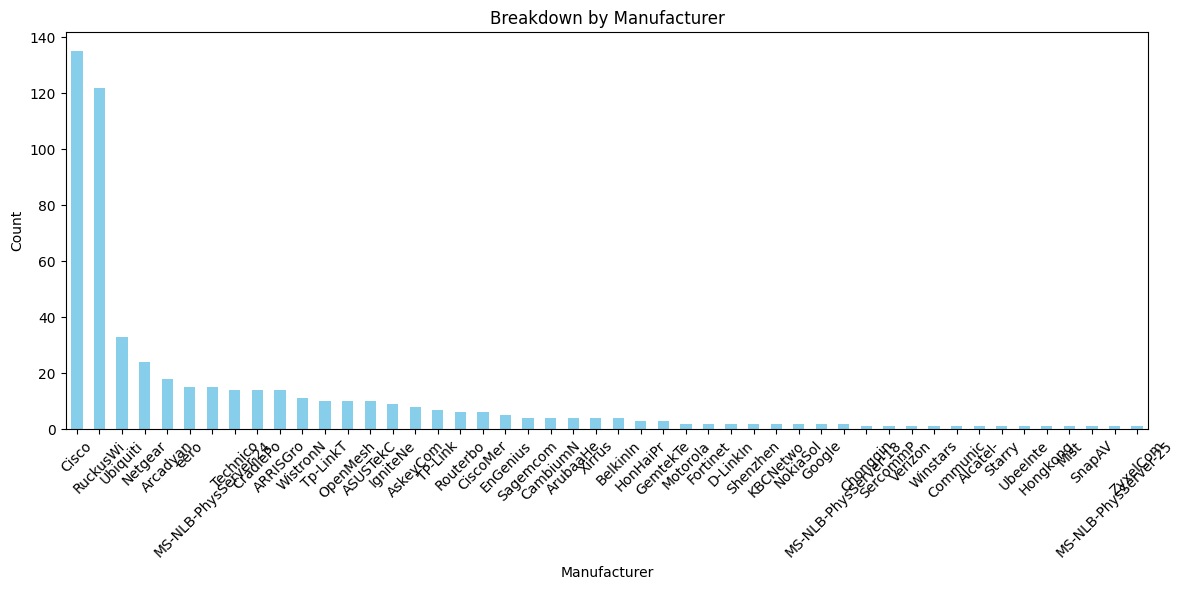

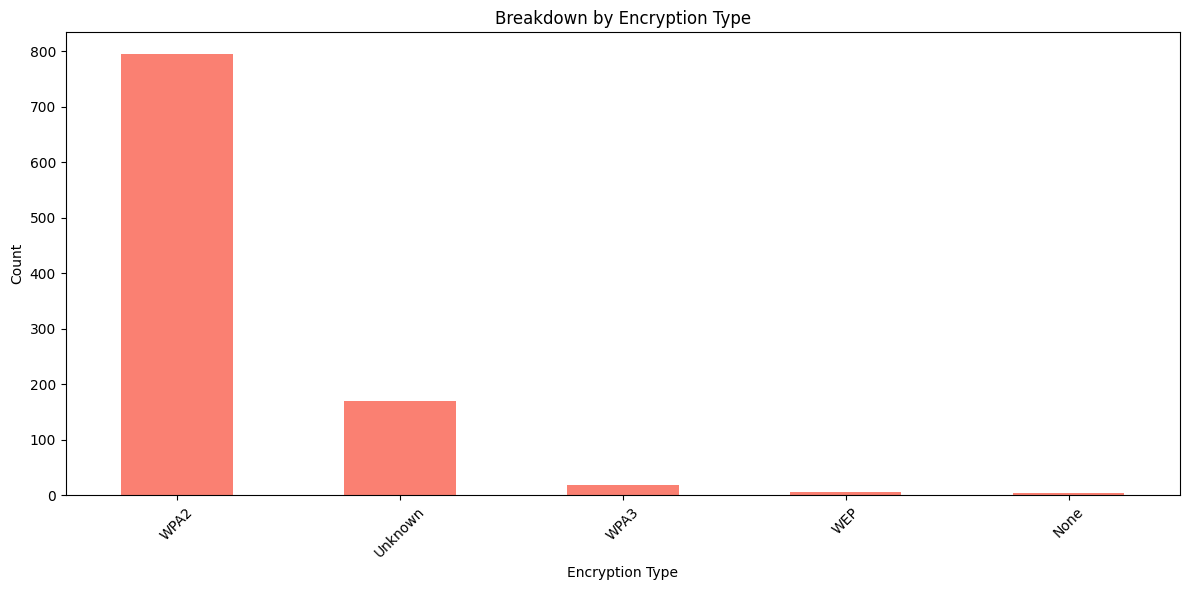


WEP Networks:
    Network Name          X          Y                MAC
0      (no SSID) -74.028481  40.709068  00:1F:9E:F7:3C:FF
38     (no SSID) -74.001564  40.762993  02:18:4A:93:39:8F
46     (no SSID) -74.001587  40.762985  02:18:5A:93:39:8F
50     (no SSID) -74.001579  40.763004  02:18:5A:93:3A:9F
561    (no SSID) -74.001587  40.762985  8A:15:04:2C:74:EF
563    (no SSID) -74.001572  40.763016  8A:15:14:2C:74:EF


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [3]:

!pip install manuf folium


# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import folium
import os
import IPython.display as display
from google.colab import files
from manuf import manuf

# Step 1: Upload the CSV file
uploaded = files.upload()
filename = list(uploaded.keys())[0]

# Parse the CSV data
df = pd.read_csv(filename)

# Extract MAC address, Encryption type, and Network Name
df['MAC'] = df['description'].str.extract(r'Network ID: ([\w:]+)')
df['Encryption'] = df['description'].str.extract(r'Encryption: (\w+)')
df['Network Name'] = df['Name']

# Identify the manufacturer using the MAC address
p = manuf.MacParser()
df['Manufacturer'] = df['MAC'].apply(lambda x: p.get_manuf(x))

# Display total number of networks
total_networks = len(df)
print(f"Total Networks: {total_networks}")

# Display breakdown of the frequency of each manufacturer
manufacturer_counts = df['Manufacturer'].value_counts()
print("\nManufacturer Breakdown:")
print(manufacturer_counts)

# Display breakdown of the frequency of each authentication type
encryption_counts = df['Encryption'].value_counts()
print("\nEncryption Type Breakdown:")
print(encryption_counts)

# Bar graph for Manufacturer
plt.figure(figsize=(12, 6))
manufacturer_counts.plot(kind='bar', color='skyblue')
plt.title('Breakdown by Manufacturer')
plt.xlabel('Manufacturer')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Bar graph for Encryption Type
plt.figure(figsize=(12, 6))
encryption_counts.plot(kind='bar', color='salmon')
plt.title('Breakdown by Encryption Type')
plt.xlabel('Encryption Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Filter for WEP networks
wep_networks = df[df['Encryption'] == 'WEP']

# Display WEP networks
print("\nWEP Networks:")
print(wep_networks[['Network Name', 'X', 'Y', 'MAC']])

# Plot WEP networks on a map
m = folium.Map(location=[wep_networks['Y'].mean(), wep_networks['X'].mean()], zoom_start=13)

for _, row in wep_networks.iterrows():
    folium.Marker(
        location=[row['Y'], row['X']],
        popup=row['Network Name'] if row['Network Name'] != '(no SSID)' else 'No SSID',
        icon=folium.Icon(icon="cloud"),
    ).add_to(m)

# Save the map to an HTML file
map_filename = "wep_networks_map.html"
m.save(map_filename)

# Download the map as an HTML file
files.download(map_filename)





Top 25 Most Common Wi-Fi Network Names:
GOLD                               40
PLATINUM                           37
SILVER                             34
Circle Line Liberty Wi-Fi          12
Orion                              11
ShowTime                           11
Circle Line Staten Island Wi-Fi    11
Spectrum Mobile                     9
Circle Line Bronx Wi-Fi             9
#DwntwnAllianceFreeWiFi             8
Circle Line Queens Wi-Fi            8
#Battery Park City Free WiFi        8
Circle Line Brooklyn Wi-Fi          7
IslandNet Admin                     7
Circle Line Manhattan Wi-Fi         7
XFINITY                             6
Riverbank West Resident             6
Governors Island                    6
QC-NY-Corp                          5
3Eleven Residents                   5
QC-NY-Guest                         5
-NYC Mesh Community WiFi-           5
GI_Private                          5
STP-Capture                         5
Riverbank 5G                        5
Name: Netw

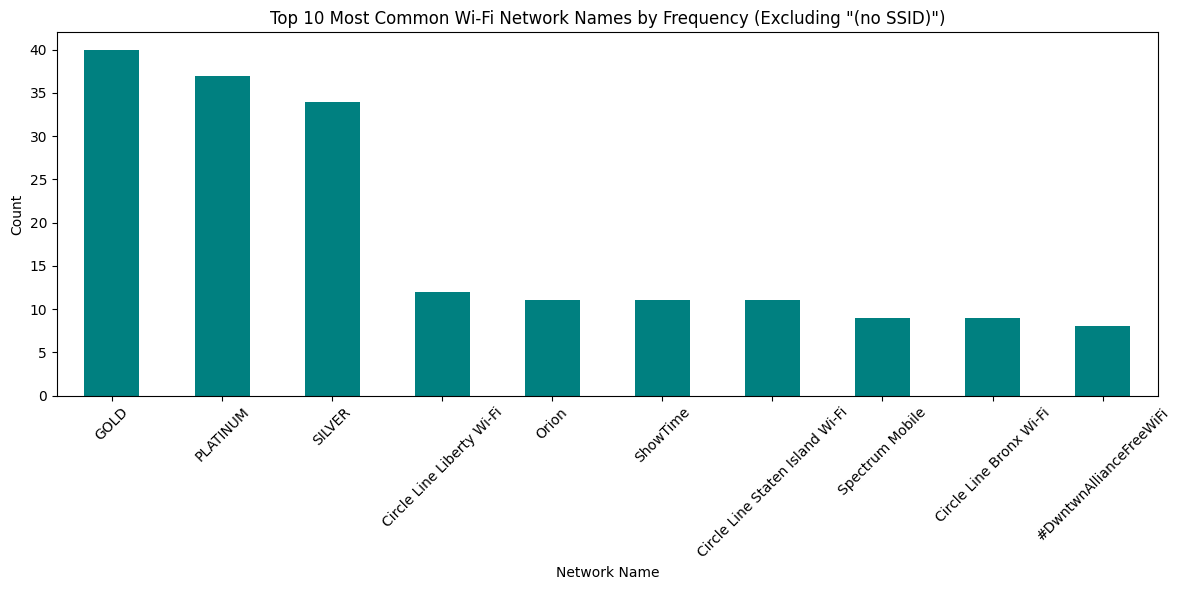

In [7]:
# Filter out "(no SSID)" and count occurrences of each network name
filtered_network_names = df[df['Network Name'] != '(no SSID)']['Network Name'].value_counts()

# Display the top 25 most common network names
top_25_network_names = filtered_network_names.head(25)
print("Top 25 Most Common Wi-Fi Network Names:")
print(top_25_network_names)


# 2. List the open Wi-Fi networks detected
open_network_names = df[(df['Encryption'] == 'Open') & (df['Network Name'] != '(no SSID)')]['Network Name'].unique()
print("\nOpen Wi-Fi Networks Detected:")
print(open_network_names)

# 3. Display a bar graph of the most common Wi-Fi network names by the frequency they appear, excluding "(no SSID)"
plt.figure(figsize=(12, 6))
top_25_network_names.head(10).plot(kind='bar', color='teal')  # Displaying top 10 for clarity
plt.title('Top 10 Most Common Wi-Fi Network Names by Frequency (Excluding "(no SSID)")')
plt.xlabel('Network Name')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In [5]:
from google.colab import files

# List of specified networks
networks_to_plot = ["GOLD", "PLATINUM", "SILVER", "Circle Line Liberty Wi-Fi"]

# Function to plot and save map for a specific network
def plot_network_map(network_name):
    # Filter the dataframe for the specified network
    network_data = df[df['Network Name'] == network_name]

    # Create a map centered around the mean coordinates of the network data
    m = folium.Map(location=[network_data['Y'].mean(), network_data['X'].mean()], zoom_start=13)

    # Add markers for each location of the network
    for _, row in network_data.iterrows():
        folium.Marker(
            location=[row['Y'], row['X']],
            popup=row['Network Name'],
            icon=folium.Icon(icon="cloud"),
        ).add_to(m)

    # Save the map to an HTML file
    map_filename = f"{network_name.replace(' ', '_')}_map.html"
    m.save(map_filename)

    # Provide a link to download the map
    files.download(map_filename)

# Plot maps for each specified network
for network in networks_to_plot:
    plot_network_map(network)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [6]:
# Create a map centered around the mean coordinates of all data points
m_all = folium.Map(location=[df['Y'].mean(), df['X'].mean()], zoom_start=13)

# Add markers for each location in the dataset
for _, row in df.iterrows():
    folium.Marker(
        location=[row['Y'], row['X']],
        popup=row['Network Name'] if row['Network Name'] != '(no SSID)' else 'No SSID',
        icon=folium.Icon(icon="cloud"),
    ).add_to(m_all)

# Save the map to an HTML file
all_map_filename = "all_data_points_map.html"
m_all.save(all_map_filename)

# Provide a link to download the map
files.download(all_map_filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>